# Mundo 25

### Análise de dados

In [1]:
import pandas as pd
import yfinance as yf  
import numpy as np

In [2]:
dados_acao = yf.download("PETR4.SA", "2010-01-01", "2022-08-31")['Close']

dados_acao = dados_acao.to_frame()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [3]:
dados_acao

Ticker,PETR4.SA
Date,
2010-01-04,9.238534
2010-01-05,9.159318
2010-01-06,9.283093
2010-01-07,9.196452
2010-01-08,9.146940
...,...
2022-08-24,19.833109
2022-08-25,19.620867
2022-08-26,19.833109


In [4]:
media_movel_250d = dados_acao.rolling(250).mean()

media_movel_250d

Ticker,PETR4.SA
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
...,...
2022-08-24,12.529705
2022-08-25,12.569306
2022-08-26,12.610092


In [5]:
dados_acao['MM250D'] = media_movel_250d.values

dados_acao = dados_acao.dropna()

dados_acao

Ticker,PETR4.SA,MM250D
Date,,
2011-01-05,6.978893,7.442958
2011-01-06,6.950691,7.433807
2011-01-07,6.853264,7.424582
2011-01-10,6.917359,7.415119
2011-01-11,6.960945,7.406177
...,...,...
2022-08-24,19.833109,12.529705
2022-08-25,19.620867,12.569306
2022-08-26,19.833109,12.610092


<Axes: xlabel='Date'>

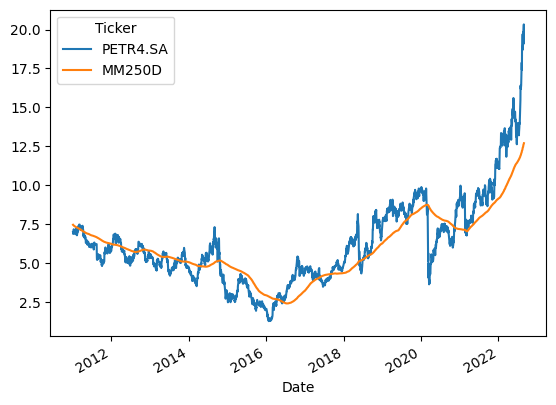

In [6]:
dados_acao.plot()

In [7]:
dados_acao['Ordem'] = np.where(dados_acao['Close'] > dados_acao['MM250D'], "Compra", "Venda")

dados_acao

KeyError: 'Close'

In [ ]:
media_movel_exp = dados_acao['Close'].ewm(span = 250).mean()

media_movel_exp

In [ ]:
media_movel_250d.plot()
media_movel_exp.plot()

In [ ]:
volatilidade_diaria_12m = dados_acao['Close'].pct_change().rolling(250).std()

volatilidade_diaria_12m

In [ ]:
volatilidade_diaria_12m = volatilidade_diaria_12m.dropna()

volatilidade_diaria_12m = volatilidade_diaria_12m * np.sqrt(252)

volatilidade_diaria_12m

In [ ]:
volatilidade_diaria_12m.plot()

# Exercícios
<BR>
    
* Exercício 81: Puxe dados de uma ação a sua escolha e calcule a média móvel de 30 dias desde 01/01/2020. Depois, identifique os sinais de compra ou venda, baseado na média móvel.
<BR>
    
* Exercício 82: Com os dados do exercício 81, calcule a média móvel exponencial de 30 dias.
<bR>
    
* Exercício 83: Com os dados do exercício 81, calcule a volatilidade dos retornos diários anualidada no período. 

In [ ]:
#gabarito 81

dados_acao = yf.download("WEGE3.SA", "2020-01-01", "2022-08-31")['Close']

dados_acao = dados_acao.to_frame()

dados_acao['MM30D'] = dados_acao.rolling(30).mean()

dados_acao = dados_acao.dropna()

dados_acao.plot()

In [ ]:
dados_acao['Ordem'] = np.where(dados_acao['Close'] > dados_acao['MM30D'], "Compra", "Venda")

dados_acao

In [ ]:
#gabarito 82
dados_acao = yf.download("WEGE3.SA", "2020-01-01", "2022-08-31")['Close']

dados_acao = dados_acao.to_frame()

dados_acao['EWM'] = dados_acao.ewm(span = 30).mean()

dados_acao.plot()

In [ ]:
#gabarito 83

dados_acao = yf.download("WEGE3.SA", "2020-01-01", "2022-08-31")['Close']

vol252d = dados_acao.pct_change().rolling(252).std()
vol252d = vol252d.dropna()
vol252d_anualizada = vol252d * np.sqrt(252)

vol252d_anualizada.plot()

# Mundo 26

Continuando nossa análise de dados, como podemos calcular as correlações e covariâncias entre retornos?